## Name : Shreekant Sunil Lohagale
## Roll No. : MLTB32

---

## Practical 01 : Data exploration and visualization with calculating the trend line, removing outliers of house selling dataset.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/Housing.csv')

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


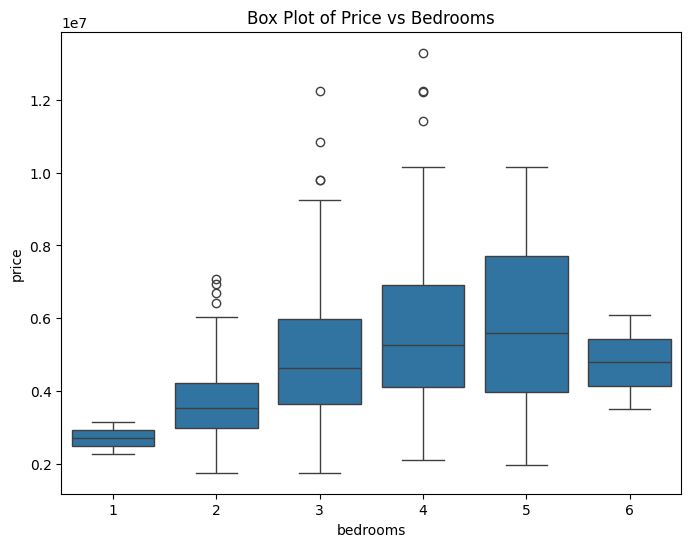

In [10]:
# Visualization of outliers using box plots

plt.figure(figsize=(8, 6))
sns.boxplot(y = 'price', x = 'bedrooms', data=df)
plt.title('Box Plot of Price vs Bedrooms')
plt.show()


In [11]:
# Removal of outliers

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             530 non-null    int64 
 1   area              530 non-null    int64 
 2   bedrooms          530 non-null    int64 
 3   bathrooms         530 non-null    int64 
 4   stories           530 non-null    int64 
 5   mainroad          530 non-null    object
 6   guestroom         530 non-null    object
 7   basement          530 non-null    object
 8   hotwaterheating   530 non-null    object
 9   airconditioning   530 non-null    object
 10  parking           530 non-null    int64 
 11  prefarea          530 non-null    object
 12  furnishingstatus  530 non-null    object
dtypes: int64(6), object(7)
memory usage: 58.0+ KB


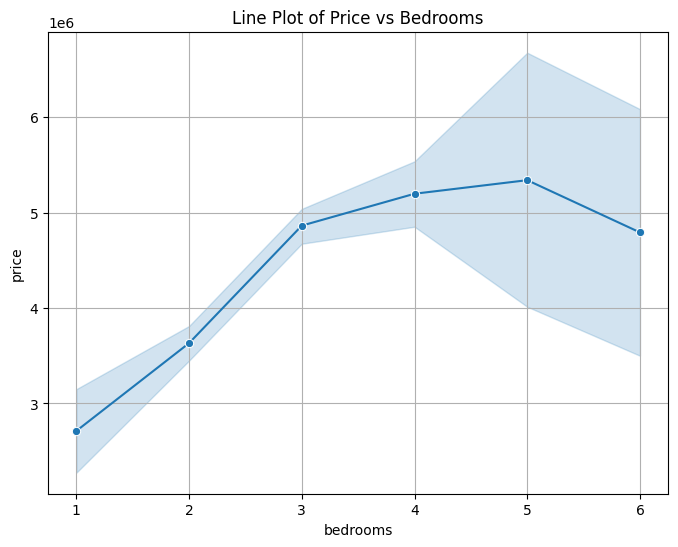

In [14]:
# TRead line on data

plt.figure(figsize=(8, 6))
sns.lineplot(x = 'bedrooms', y = 'price', data=df, marker='o')
plt.title('Line Plot of Price vs Bedrooms')
plt.grid()
plt.show()

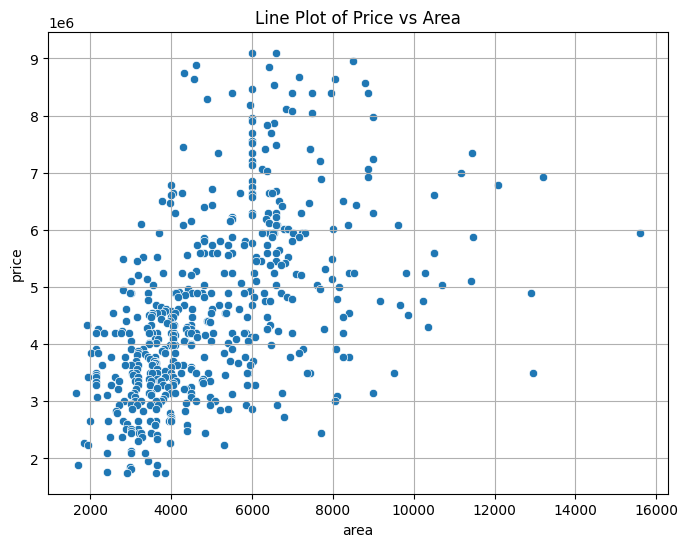

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = 'area', y = 'price', data=df, marker='o')
plt.title('Line Plot of Price vs Area')
plt.grid()
plt.show()

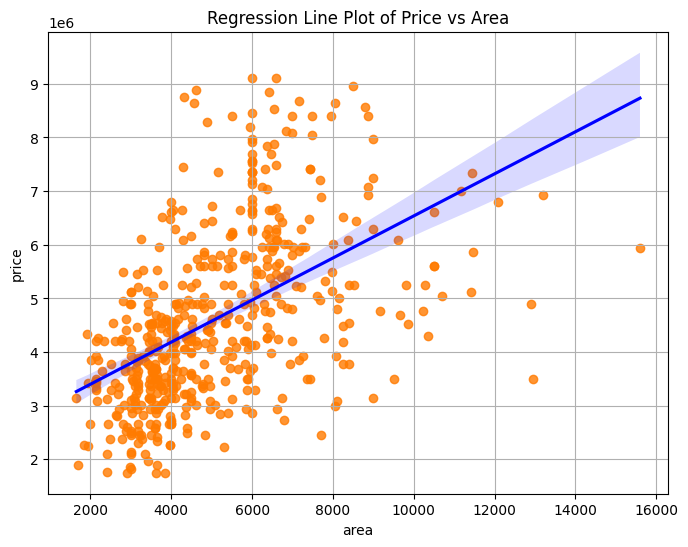

In [15]:
# regression line plot

plt.figure(figsize=(8, 6))
sns.regplot(x = 'area', y = 'price', data=df, color="#FF7B00", line_kws={'color': 'blue'})
plt.title('Regression Line Plot of Price vs Area')
plt.grid()
plt.show()

#### Conclusion

##### In this practical, data exploration and visualization were successfully performed on the house selling price dataset using Python. The dataset was first preprocessed to understand its structure, handle missing values, and prepare it for analysis. Visualization techniques such as scatter plots and line plots helped in identifying patterns and relationships between house features and selling prices.

##### Outliers present in the dataset were identified and removed to reduce noise and improve the reliability of the analysis. Removing outliers resulted in a clearer distribution of data and improved the accuracy of the trend analysis. A trend line was calculated and visualized, which showed a clear relationship between the selected features (such as house size) and the selling price.

##### Overall, this practical demonstrated how data exploration, outlier removal, and trend line calculation help in uncovering meaningful patterns from real-world data. The results highlight the importance of preprocessing and visualization as the first step in pattern recognition and predictive modeling. This practical also provided hands-on experience with Python libraries such as NumPy, Pandas, and Matplotlib, forming a strong foundation for future machine learning and regression tasks.

### Date : 

#### Faculty : Dr. Yudhishthir Raut
#### Signature: 